### Maestría de Economía 

**FCS UdeLar**

**Tarea de Teoría de Precios**

**Nombre: David Escandón**



In [105]:
import matplotlib as mt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as ppl
import seaborn as sns
from lifelines import NelsonAalenFitter
from IPython.display import HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**1.-Previo. Analice la base. Determine la periodicidad, el numero de supermercados, y para cada uno, la categoria establecida presente estadisticos descriptivos de los precios (min, max, mediana, promedio desvio estandar)**

*Definición de variables:*

*df_aceite --> dataframe del aceite*

*df_agua --> dataframe del agua*

*df_mayonesa--> dataframe de mayonesa*

*df_refrescos --> dataframe de refrescos*

*df_yerba --> dataframe de yerba*

*df_ut --> dataframe del total de las bases unidas*

*mean_type_prod--> medias para cada producto y categoría*

In [2]:
## Importamos cada una de las bases
df_aceite = pd.read_csv("C:/Users/david/OneDrive/Proyectos/Teoria de Precios/bases/Aceite.csv")
df_agua = pd.read_csv("C:/Users/david/OneDrive/Proyectos/Teoria de Precios/bases/Agua.csv")
df_mayonesa = pd.read_csv("C:/Users/david/OneDrive/Proyectos/Teoria de Precios/bases/Mayonesa.csv")
df_refrescos = pd.read_csv("C:/Users/david/OneDrive/Proyectos/Teoria de Precios/bases/Refrescos.csv")
df_yerba = pd.read_csv("C:/Users/david/OneDrive/Proyectos/Teoria de Precios/bases/Yerba.csv")

In [3]:
#df_aceite['chain'].value_counts()

In [4]:
df_agua['Product'].value_counts()

12    27049
10    24855
11    17773
Name: Product, dtype: int64

In [5]:
#df_mayonesa['Product'].value_counts()

In [6]:
#df_refrescos['Product'].value_counts()

In [7]:
#df_yerba['Product'].value_counts()

*se agrega una columna para cada una de las bases según su tipo de producto para luego unirlas en una sola base total*

In [8]:
df_aceite.loc[:,'Tipo'] = pd.Series('Aceite', index=df_aceite.index) 
df_mayonesa.loc[:,'Tipo'] = pd.Series('Mayonesa', index=df_mayonesa.index)
df_refrescos.loc[:,'Tipo'] = pd.Series('Refrescos', index=df_refrescos.index) 
df_agua.loc[:,'Tipo'] = pd.Series('Agua', index=df_agua.index)   
df_yerba.loc[:,'Tipo'] = pd.Series('Yerba', index=df_yerba.index)   

*Ejemplo en el caso de la base de agua (df_agua) de como quedarian el resto de bases con la nueva columna acorde al "tipo"*

In [9]:
df_agua.head()

,Super,Product,Year,Month,Precio,depto,chain,city,Tipo
0,1,11,2013,12,28.0,Montevideo,Ubesur,Montevideo,Agua
1,1,12,2013,12,32.0,Montevideo,Ubesur,Montevideo,Agua
2,1,10,2013,12,24.0,Montevideo,Ubesur,Montevideo,Agua
3,1,12,2013,11,32.0,Montevideo,Ubesur,Montevideo,Agua
4,1,10,2014,8,26.0,Montevideo,Ubesur,Montevideo,Agua


*Se unen todas las bases en un solo dataframe. La nueva base tendrá el nombre de "df_ut"*

In [10]:
df_u1 = pd.concat([df_aceite, df_agua], ignore_index=True)
df_u2 = pd.concat([df_u1, df_mayonesa], ignore_index=True)
df_u2 = pd.concat([df_u2, df_refrescos], ignore_index=True)
df_ut = pd.concat([df_u2, df_yerba], ignore_index=True)
df_ut.head() ## df del total de dataframes

,Super,Product,Year,Month,Precio,depto,chain,city,Tipo
0,1,1,2013,12,59.0,Montevideo,Ubesur,Montevideo,Aceite
1,1,2,2013,12,59.0,Montevideo,Ubesur,Montevideo,Aceite
2,1,3,2013,12,58.0,Montevideo,Ubesur,Montevideo,Aceite
3,1,1,2012,12,59.0,Montevideo,Ubesur,Montevideo,Aceite
4,1,2,2012,12,58.0,Montevideo,Ubesur,Montevideo,Aceite


*Periodos de la base*

In [11]:
df_t_sorted = df_ut.sort_values(by =['Year','Month'], ascending=True)
periodos = df_t_sorted.groupby(["Year", "Month"])['Tipo'].size().reset_index()
periodos = periodos.filter(["Year","Month"])
periodos_t=periodos.T
periodos_t
#periodos_t.style.set_caption("Tabla de los Periodos (meses/años) de la Base")


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
Year,2007,2007,2007,2007,2007,2007,2007,2007,2007,2008,...,2013,2014,2014,2014,2014,2014,2014,2014,2014,2014
Month,4,5,6,7,8,9,10,11,12,1,...,12,1,2,3,4,5,6,7,8,9


*Numero de Supermercados acorde al dataframe de la base total "dt_ut"*

In [173]:
df_t_sorted = df_ut.sort_values(by =['Year','Month'], ascending=True)
df_chain_n=df_t_sorted.groupby(['chain'])['Tipo'].size().reset_index()  ## OJO CON ESTO

df_chain_n= df_chain_n.filter(['chain'])
df_chain_n
#chain_numbers = df_chain_n.filter(['chain'])
#chain_numbers

,chain
0,Devoto
1,Disco
2,El Clon
3,El Dorado
4,Frigo
5,Géant
6,Iberpark
7,La Colonial
8,Los Jardines
9,Macromercado Mayorista


*Cuadro de estadísticos de precios acorde al tipo de producto.*

In [15]:
df_estadistico=df_ut.groupby(['Tipo'])['Precio'].describe() ## estadistico de precios acorde al tipo de producto
df_estadistico.style.set_caption("Cuadro Estadístico para cada Producto")


,count,mean,std,min,25%,50%,75%,max
Tipo,,,,,,,,
Aceite,51108.000000,50.439964,6.453380,17.900000,45.900000,51.000000,55.000000,84.000000
Agua,69677.000000,22.835611,4.613097,12.900000,19.000000,22.900000,26.000000,37.000000
Mayonesa,60932.000000,41.629879,13.778363,9.900000,31.000000,39.000000,49.500000,89.000000
Refrescos,47028.000000,44.991880,10.292070,15.700000,36.000000,45.000000,54.000000,70.000000
Yerba,68000.000000,79.728200,25.709454,31.900000,64.000000,69.900000,84.000000,175.000000


*BarChart de la media de cada producto y sus categorías correspondientes*

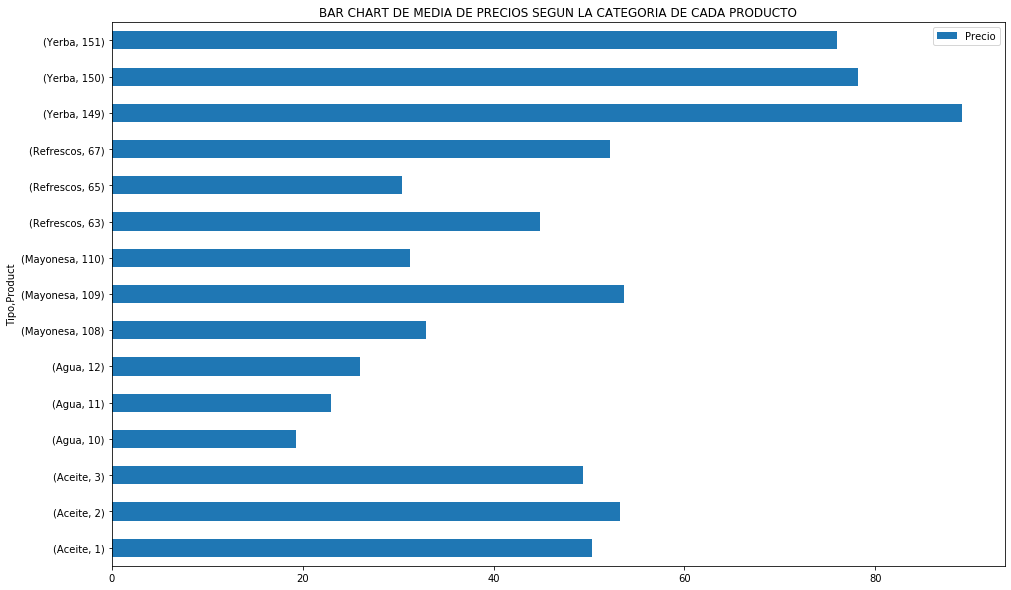

In [106]:
#mean_type_prod_plot=df_ut.groupby(['Tipo','Product'])[['Precio']].mean().plot.bar()
#mean_type_prod_plot.set_title('Media de Precios segun su Tipo y Categoria')
df_ut.groupby(['Tipo','Product'])[['Precio']].mean().plot(kind='barh', figsize=(16,10), title='BAR CHART DE MEDIA DE PRECIOS SEGUN LA CATEGORIA DE CADA PRODUCTO')

*Media de cada categoria de producto*

In [17]:
mean_type_prod=df_ut.groupby(['Tipo','Product'],as_index=False)[['Precio']].mean()
mean_type_prod.style.set_caption("Tabla de la Media de cada Producto según su Categoría")

,Tipo,Product,Precio
0,Aceite,1,50.326093
1,Aceite,2,53.235406
2,Aceite,3,49.328445
3,Agua,10,19.320444
4,Agua,11,22.992905
5,Agua,12,25.962302
6,Mayonesa,108,32.928625
7,Mayonesa,109,53.684983
8,Mayonesa,110,31.243403
9,Refrescos,63,44.892815


**2.-Calcule, para cada bien y para el total, el porcentaje de cambios de precio en el total (en
porcentaje a dos dígitos). ¿Cuántos son al alza y cuantos a la baja? Para el total utilice la
mediana.**

*Se Procede a preparar la base para el análisis de  de variaciones*

In [18]:
df_aceite_sorted = df_aceite.sort_values(by =['Year','Month'], ascending=True)
df_aceite_sf = df_aceite_sorted.filter(["Year", "Month", "Product","Precio"]).reset_index()
df_aceite_sf.head(5)

,index,Year,Month,Product,Precio
0,1614,2007,4,1,32.9
1,1766,2007,4,1,32.9
2,1837,2007,4,1,32.9
3,1879,2007,4,1,32.9
4,1974,2007,4,1,31.9


In [19]:
# recibe un array de dos valores y calcula la variacion
def variacion_precios(x):
    t = x.values # x es un Pandas series y nos interesa ver los valores
    return (t[1]-t[0])/t[0]

In [20]:
df_ut_st=df_ut.sort_values(by =['Year','Month'], ascending=True) #dataframe del total ordenado
df_ut_sf = df_ut_st.filter(["Year", "Month",'Tipo', "Product","Precio"]).reset_index() #data del total ordenado y filtrado
df_ut_sf.head(4)

,index,Year,Month,Tipo,Product,Precio
0,1614,2007,4,Aceite,1,32.9
1,1766,2007,4,Aceite,1,32.9
2,1837,2007,4,Aceite,1,32.9
3,1879,2007,4,Aceite,1,32.9


In [21]:
df_pr_var = df_ut_sf.groupby('Product').rolling(2).agg({'Precio': variacion_precios}).reset_index()[['Product', 'Precio']]
df_pr_var

,Product,Precio
0,1,NaN
1,1,0.000000
2,1,0.000000
3,1,0.000000
4,1,-0.030395
...,...,...
296740,151,0.000000
296741,151,-0.093333
296742,151,0.000000
296743,151,0.029412


In [143]:
df_ut_sf['Variacion']= df_pr_var['Precio']*100
df_ut_sf.head()

,level_0,index,Year,Month,Tipo,Product,Precio,Variacion
0,0,1614,2007,4,Aceite,1,32.9,NaN
1,1,1766,2007,4,Aceite,1,32.9,0.000000
2,2,1837,2007,4,Aceite,1,32.9,0.000000
3,3,1879,2007,4,Aceite,1,32.9,0.000000
4,4,1974,2007,4,Aceite,1,31.9,-3.039514


In [23]:
df_ut_sf=df_ut_sf.reset_index() ## Base total con la columna de variacion
df_ut_sf.head(7)

,level_0,index,Year,Month,Tipo,Product,Precio,Variacion
0,0,1614,2007,4,Aceite,1,32.9,NaN
1,1,1766,2007,4,Aceite,1,32.9,0.000000
2,2,1837,2007,4,Aceite,1,32.9,0.000000
3,3,1879,2007,4,Aceite,1,32.9,0.000000
4,4,1974,2007,4,Aceite,1,31.9,-3.039514
5,5,2126,2007,4,Aceite,1,32.9,3.134796
6,6,2197,2007,4,Aceite,1,32.9,0.000000


*Cantidad de variaciones del precio del Aceite a la alta y a la baja*

In [24]:
aceite_baja = df_ut_sf[(df_ut_sf['Tipo']=='Aceite') & (df_ut_sf['Variacion']<0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la baja en en aceites
aceite_baja.style.set_caption("Cantidad de Variaciones de Aceite a la Baja")
aceite_alza = df_ut_sf[(df_ut_sf['Tipo']=='Aceite') & (df_ut_sf['Variacion']>0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la alza en en aceites
aceite_alza.style.set_caption("Cantidad de Variaciones de Aceite a la Alza")
aceite_sinvar = df_ut_sf[(df_ut_sf['Tipo']=='Aceite') & (df_ut_sf['Variacion']==0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## sin variacion en en aceites
aceite_sinvar.style.set_caption("Cantidad de Precios de Aceite sin variacion")
aceite_convar = df_ut_sf[(df_ut_sf['Tipo']=='Aceite') & (df_ut_sf['Variacion']!=0)].groupby(['Tipo'],as_index=False)['Variacion'].median() ## sin variacion en en aceites
aceite_convar.style.set_caption("Mediana del total de varaición de Aceites")

,Tipo,Variacion
0,Aceite,11209


,Tipo,Variacion
0,Aceite,11207


,Tipo,Variacion
0,Aceite,28690


,Tipo,Variacion
0,Aceite,-0.000000


In [25]:
refrescos_baja = df_ut_sf[(df_ut_sf['Tipo']=='Refrescos') & (df_ut_sf['Variacion']<0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la baja en en aceites
refrescos_baja.style.set_caption("Cantidad de Variaciones de Refrescos a la Baja")
refrescos_alza = df_ut_sf[(df_ut_sf['Tipo']=='Refrescos') & (df_ut_sf['Variacion']>0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la alza en en aceites
refrescos_alza.style.set_caption("Cantidad de Variaciones de Refrescos a la Alza")
refrescos_sinvar = df_ut_sf[(df_ut_sf['Tipo']=='Refrescos') & (df_ut_sf['Variacion']==0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## sin variacion en en aceites
refrescos_sinvar.style.set_caption("Cantidad de Precios de Refrescos sin variacion")
refrescos_convar = df_ut_sf[(df_ut_sf['Tipo']=='Refrescos') & (df_ut_sf['Variacion']!=0)].groupby(['Tipo'],as_index=False)['Variacion'].median() ## con variacion en en aceites
refrescos_convar.style.set_caption("Mediana del total de Variación de Refrescos")

,Tipo,Variacion
0,Refrescos,10749


,Tipo,Variacion
0,Refrescos,10766


,Tipo,Variacion
0,Refrescos,25510


,Tipo,Variacion
0,Refrescos,0.066220


In [26]:
agua_baja = df_ut_sf[(df_ut_sf['Tipo']=='Agua') & (df_ut_sf['Variacion']<0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la baja en en agua
agua_baja.style.set_caption("Cantidad de Variaciones de Agua a la Baja")
agua_alza = df_ut_sf[(df_ut_sf['Tipo']=='Agua') & (df_ut_sf['Variacion']>0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la alza en en agua
agua_alza.style.set_caption("Cantidad de Variaciones de Agua a la Alza")
agua_sinvar = df_ut_sf[(df_ut_sf['Tipo']=='Agua') & (df_ut_sf['Variacion']==0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## sin variacion en en agua
agua_sinvar.style.set_caption("Cantidad de precios de Agua sin variacion")
agua_convar = df_ut_sf[(df_ut_sf['Tipo']=='Agua') & (df_ut_sf['Variacion']!=0)].groupby(['Tipo'],as_index=False)['Variacion'].median() ## con variacion en en agua
agua_convar.style.set_caption("Mediana del total de Variaciones de Agua")

,Tipo,Variacion
0,Agua,15749


,Tipo,Variacion
0,Agua,15714


,Tipo,Variacion
0,Agua,38211


,Tipo,Variacion
0,Agua,-0.000000


In [27]:
mayosa_baja = df_ut_sf[(df_ut_sf['Tipo']=='Mayonesa') & (df_ut_sf['Variacion']<0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la baja en en aceites
mayosa_baja.style.set_caption("Cantidad de Variaciones de Mayonesa a la Baja")
mayosa_alza = df_ut_sf[(df_ut_sf['Tipo']=='Mayonesa') & (df_ut_sf['Variacion']>0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la alza en en aceites
mayosa_alza.style.set_caption("Cantidad de Variaciones de Mayonesa a la Alza")
mayosa_sinvar = df_ut_sf[(df_ut_sf['Tipo']=='Mayonesa') & (df_ut_sf['Variacion']==0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## sin variacion en en aceites
mayosa_sinvar.style.set_caption("Cantidad de precios de Mayonesa sin variacion")
mayosa_convar = df_ut_sf[(df_ut_sf['Tipo']=='Mayonesa') & (df_ut_sf['Variacion']!=0)].groupby(['Tipo'],as_index=False)['Variacion'].median() ## sin variacion en en aceites
mayosa_convar.style.set_caption("Mediana del total de Variación de Mayonesa)")

,Tipo,Variacion
0,Mayonesa,13833


,Tipo,Variacion
0,Mayonesa,13675


,Tipo,Variacion
0,Mayonesa,33420


,Tipo,Variacion
0,Mayonesa,-0.151515


In [28]:
yerba_baja = df_ut_sf[(df_ut_sf['Tipo']=='Yerba') & (df_ut_sf['Variacion']<0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la baja en en aceites
yerba_baja.style.set_caption("Cantidad de Variaciones de Yerba a la Baja")
yerba_alza = df_ut_sf[(df_ut_sf['Tipo']=='Yerba') & (df_ut_sf['Variacion']>0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## a la alza en en aceites
yerba_alza.style.set_caption("Cantidad de Variaciones de Yerba a la Alza")
yerba_sinvar = df_ut_sf[(df_ut_sf['Tipo']=='Yerba') & (df_ut_sf['Variacion']==0)].groupby(['Tipo'],as_index=False)['Variacion'].count() ## sin variacion en en aceites
yerba_sinvar.style.set_caption("Cantidad de Yerba sin variacion")
yerba_convar = df_ut_sf[(df_ut_sf['Tipo']=='Yerba') & (df_ut_sf['Variacion']!=0)].groupby(['Tipo'],as_index=False)['Variacion'].median() ## mediana de la  variacion total en en aceites
yerba_convar.style.set_caption("Mediana del total de Variación de Yerba")

,Tipo,Variacion
0,Yerba,15383


,Tipo,Variacion
0,Yerba,15321


,Tipo,Variacion
0,Yerba,37293


,Tipo,Variacion
0,Yerba,-0.128205


**3.-Calcule la rigidez relativa de los precios para cada bien (es decir la mediana de cada cuantos meses cambia el precio )**

In [147]:
rigid_oil = df_ut_sf[(df_ut_sf['Tipo']=='Aceite') & (df_ut_sf['Variacion']!=0)].groupby(['Year','Month'],as_index=False)['Variacion'].median() ## sin variacion en en aceites
rigid_oil=rigid_oil.rename(columns = {'Variacion':'Rigid Price'})
rigid_oil.style.set_caption("Rigidez Relativa del Aceite para cada Mes y año")


,Year,Month,Rigid Price
0,2007,4,0.911854
1,2007,5,0.233645
2,2007,6,0.182482
3,2007,7,0.898876
4,2007,8,-0.811359
5,2007,9,-0.235327
6,2007,10,-1.347723
7,2007,11,-0.181818
8,2007,12,1.102941
9,2008,1,1.770050


In [148]:
rigid_refrescos = df_ut_sf[(df_ut_sf['Tipo']=='Refrescos') & (df_ut_sf['Variacion']!=0)].groupby(['Year','Month'],as_index=False)['Variacion'].median() ## sin variacion en en aceites
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
rigid_refrescos=rigid_refrescos.rename(columns = {'Variacion':'Rigid Price'})
rigid_refrescos.style.set_caption("Rigidez Relativa de los Refrescos para cada Mes y año")

,Year,Month,Rigid Price
0,2007,4,0.909091
1,2007,5,0.795229
2,2007,6,0.489237
3,2007,7,-0.221729
4,2007,8,-0.108696
5,2007,9,-0.116279
6,2007,10,1.073345
7,2007,11,-0.178571
8,2007,12,-0.599172
9,2008,1,0.182149


In [149]:
rigid_agua = df_ut_sf[(df_ut_sf['Tipo']=='Agua') & (df_ut_sf['Variacion']!=0)].groupby(['Year','Month'],as_index=False)['Variacion'].median() ## con variacion en agua
rigid_agua=rigid_agua.rename(columns = {'Variacion':'Rigid Price'})
rigid_agua.style.set_caption("Rigidez Relativa del Agua para cada Mes y año")

,Year,Month,Rigid Price
0,2007,4,-0.977995
1,2007,5,-0.639659
2,2007,6,-0.200401
3,2007,7,-0.000000
4,2007,8,-1.098901
5,2007,9,-0.222222
6,2007,10,0.638298
7,2007,11,-0.192308
8,2007,12,-0.742115
9,2008,1,0.869565


In [150]:
rigid_mayonesa = df_ut_sf[(df_ut_sf['Tipo']=='Mayonesa') & (df_ut_sf['Variacion']!=0)].groupby(['Year','Month'],as_index=False)['Variacion'].median() ## con variacion en la variacion en la mayonesa
rigid_mayonesa=rigid_mayonesa.rename(columns = {'Variacion':'Rigid Price'})
rigid_mayonesa.style.set_caption("Rigidez Relativa de la Mayonesa para cada Mes y Año")

,Year,Month,Rigid Price
0,2007,4,-0.398629
1,2007,5,-0.192144
2,2007,6,-0.579151
3,2007,7,-0.669643
4,2007,8,-0.227273
5,2007,9,-0.444444
6,2007,10,0.196540
7,2007,11,-0.377358
8,2007,12,0.649406
9,2008,1,0.344828


In [151]:
rigid_yerba = df_ut_sf[(df_ut_sf['Tipo']=='Yerba') & (df_ut_sf['Variacion']!=0)].groupby(['Year','Month'],as_index=False)['Variacion'].median() ## con variacion en la variacion en la Yerba
rigid_yerba=rigid_yerba.rename(columns = {'Variacion':'Rigid Price'})
rigid_yerba.style.set_caption("Rigidez Relativa de la Yerba para cada Mes y Año")

,Year,Month,Rigid Price
0,2007,4,-0.890869
1,2007,5,-0.741657
2,2007,6,-0.351779
3,2007,7,-0.217865
4,2007,8,-0.584164
5,2007,9,0.227790
6,2007,10,0.196540
7,2007,11,-0.840489
8,2007,12,-0.163934
9,2008,1,0.272893


**4.-Realice un histograma de los cambios de los precios en la base**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022185B69208>]],
      dtype=object)

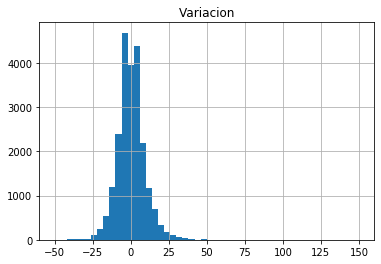

In [137]:
total_var_oil = df_ut_sf[(df_ut_sf['Variacion']!=0)&(df_ut_sf['Tipo']=='Aceite')].sort_values(by =['index','Variacion'], ascending = True)
df_var_oil = total_var_oil.filter(['Variacion'])
df_var_oil.hist(bins=50, range=[-50, 150], density=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022183F7E508>]],
      dtype=object)

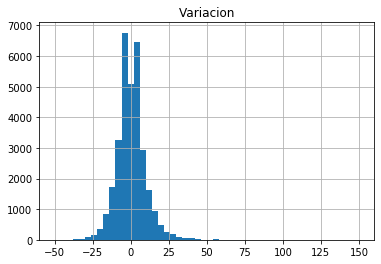

In [123]:
total_var_agua = df_ut_sf[(df_ut_sf['Variacion']!=0)&(df_ut_sf['Tipo']=='Agua')].sort_values(by =['index','Variacion'], ascending = True)
df_var_agua = total_var_agua.filter(['Variacion'])
df_var_agua.hist(bins=50, range=[-50, 150])

In [142]:
import plotly.express as px
#df_var_agua
fig = px.histogram(df_var_agua, x="Variacion", histfunc='avg', title='Histograma para el cambio de precios del Agua')
fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221EEBA8788>]],
      dtype=object)

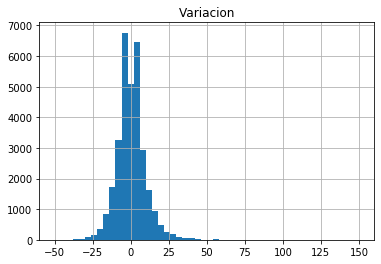

In [36]:
total_var_refrescos = df_ut_sf[(df_ut_sf['Variacion']!=0)&(df_ut_sf['Tipo']=='Refrescos')].sort_values(by =['index','Variacion'], ascending = True)
df_var_refrescos = total_var_refrescos.filter(['Variacion'])
df_var_agua.hist(bins=50, range=[-50, 150])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022182951588>]],
      dtype=object)

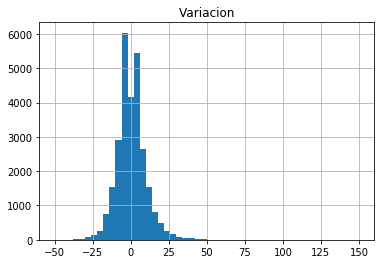

In [112]:
total_var_mayonesa = df_ut_sf[(df_ut_sf['Variacion']!=0)&(df_ut_sf['Tipo']=='Mayonesa')].sort_values(by =['index','Variacion'], ascending = True)
df_var_mayonesa = total_var_mayonesa.filter(['Variacion'])
df_var_mayonesa.hist(bins=50, range=[-50, 150])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221F50B8948>]],
      dtype=object)

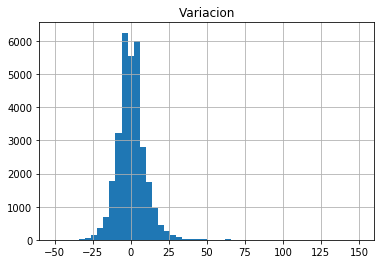

In [38]:
total_var_yerba = df_ut_sf[(df_ut_sf['Variacion']!=0)&(df_ut_sf['Tipo']=='Yerba')].sort_values(by =['index','Variacion'], ascending = True)
df_var_yerba = total_var_yerba.filter(['Variacion'])
df_var_yerba.hist(bins=50, range=[-50, 150])

**5.- Restrinja la base al año 2008. Para cada bien determine si hay convergencia a la LOP y si hay información en la base que pueda explicar esas divergencias. Compare sólo entre los
siguientes supermercados (número):**
   

a) Refrescos: 15, 16, 20

b) Aceite: 16, 29, 67

c) Agua: 67, 68, 107

d) Mayonesa: 107, 111, 146

e) Yerba: 146, 147, 158

**a) Refrescos: 15, 16, 20**

In [39]:
df_ut_sorted = df_ut.sort_values(by =['Year','Month','Product'], ascending=True)
refrescos_sulist = [15,16,20]
refrescos_2008=df_ut_sorted[(df_ut_sorted["Tipo"]=="Refrescos") & (df_ut_sorted["Year"]==2008)
                            & (df_ut_sorted["Super"].isin(refrescos_sulist)) 
                       ].filter(["Month", "Product","Precio","Super","chain","city"])
refrescos_2008.groupby(['Month','chain','Super','Product','city','Precio']).count().head(10)

Empty DataFrame
Columns: []
Index: [(1, Devoto, 15, 63, Montevideo, 42.99999999999989), (1, Devoto, 20, 63, Ciudad de la Costa, 36.999999999999794), (1, Disco, 16, 63, Montevideo, 36.999999999999794), (2, Devoto, 15, 63, Montevideo, 36.999999999999794), (2, Devoto, 20, 63, Ciudad de la Costa, 36.999999999999794), (2, Disco, 16, 63, Montevideo, 36.999999999999794), (3, Devoto, 15, 63, Montevideo, 34.9999999999999), (3, Devoto, 20, 63, Ciudad de la Costa, 34.9999999999999), (3, Disco, 16, 63, Montevideo, 34.9999999999999), (4, Devoto, 15, 63, Montevideo, 34.9999999999999)]

*Se puede observar que se viola la LOP en el mes de enero, debido a que la misma categoría de Producto, para el caso de los refrescos 6, el precio difiere según la ciudad siendo en una misma cadena de supermercados. Para el resto de meses, el precio presenta una rigidez según la cadena de supermercados e incluso entre distintas cadenas y ciudades.*

*b) Aceite: 16, 20, 67*

In [152]:
aceite_sulist = [16,29,67]
aceite_2008=df_ut_sorted[(df_ut_sorted["Tipo"]=="Aceite")  & (df_ut_sorted["Year"]==2008) 
                         & (df_ut_sorted["Super"].isin(aceite_sulist)) 
                       ].filter(["Month", "Product","Precio","Super","chain","city"])
aceite_2008.groupby(['Month','chain','Super','Product','city','Precio']).count().head(10)

Empty DataFrame
Columns: []
Index: [(1, Disco, 16, 1, Montevideo, 44.199999999999896), (1, Disco, 29, 1, Montevideo, 44.199999999999896), (1, Ta - Ta, 67, 1, Montevideo, 44.199999999999896), (2, Disco, 16, 1, Montevideo, 47.5000000000002), (2, Disco, 29, 1, Montevideo, 47.5000000000002), (2, Ta - Ta, 67, 1, Montevideo, 47.5000000000002), (3, Disco, 16, 1, Montevideo, 47.5000000000002), (3, Disco, 29, 1, Montevideo, 47.5000000000002), (3, Ta - Ta, 67, 1, Montevideo, 47.5000000000002), (4, Disco, 16, 1, Montevideo, 48.9000000000002)]

*Para el caso del aceite se puede apreciar que los precios son sólo en Montevideo. Se mantienen iguales los precios durante cada mes y en ambas cadenas hasta el mes de junio. Desde el sexto al octavo mes, ta-ta difiere el precio con respecto a Disco. A partir de noviembre, vuelven a igualarse los precios entre ellos. Como si se violara la LOP solo en esos meses, antes y luego de eso, el precio del aceite parecedería que cumple la LOP. Habría que evaluar si sucede lo mismo para distintas ciudades*

*c) Agua:67, 68, 107*

In [153]:
agua_sulist = [67, 68, 107]
agua_2008=df_ut_sorted[(df_ut_sorted["Tipo"]=="Agua")  & (df_ut_sorted["Year"]==2008) 
                         & (df_ut_sorted["Super"].isin(agua_sulist)) 
                       ].filter(["Month", "Product","Precio","Super","chain","city"])
agua_2008.groupby(['Month','chain','Super','Product','city','Precio']).count().head(10)

Empty DataFrame
Columns: []
Index: [(1, NONE, 107, 10, Maldonado, 17.0000000000001), (1, NONE, 107, 11, Maldonado, 19.0), (1, NONE, 107, 12, Maldonado, 20.0), (1, Ta - Ta, 67, 10, Montevideo, 17.0000000000001), (1, Ta - Ta, 67, 12, Montevideo, 20.0), (1, Ta - Ta, 68, 10, Montevideo, 17.0000000000001), (1, Ta - Ta, 68, 12, Montevideo, 20.0), (2, NONE, 107, 10, Maldonado, 17.0000000000001), (2, NONE, 107, 11, Maldonado, 19.0), (2, NONE, 107, 12, Maldonado, 20.0)]

*Para el caso del agua, se puede apreciar mayor rigidez en sus precios ya sea entre cadenas, supermercados e incluso a lo largo de los meses.*

*d)Mayonesa: 107, 111, 146*

In [42]:
mayonesa_sulist = [107, 111, 146]
mayonesa_2008=df_ut_sorted[(df_ut_sorted["Tipo"]=="Mayonesa")  & (df_ut_sorted["Year"]==2008) 
                         & (df_ut_sorted["Super"].isin(mayonesa_sulist)) 
                       ].filter(["Month", "Product","Precio","Super","chain","city"])
mayonesa_2008.groupby(['Month','chain','Super','Product','city','Precio']).count().head(10)

Empty DataFrame
Columns: []
Index: [(1, El Dorado, 111, 108, Maldonado, 23.7000000000001), (1, El Dorado, 111, 109, Maldonado, 39.0000000000001), (1, El Dorado, 111, 110, Maldonado, 23.0), (1, Macromercado Mayorista, 146, 108, Montevideo, 22.7000000000001), (1, Macromercado Mayorista, 146, 109, Montevideo, 38.7000000000002), (1, NONE, 107, 108, Maldonado, 23.7000000000001), (1, NONE, 107, 109, Maldonado, 39.0000000000001), (1, NONE, 107, 110, Maldonado, 23.0), (2, El Dorado, 111, 108, Maldonado, 27.1999999999999), (2, El Dorado, 111, 109, Maldonado, 42.99999999999989)]

*e)Yerba: 146, 147, 158*

In [43]:
yerba_sulist = [107, 111, 146]
yerba_2008=df_ut_sorted[(df_ut_sorted["Tipo"]=="Yerba")  & (df_ut_sorted["Year"]==2008) 
                         & (df_ut_sorted["Super"].isin(yerba_sulist)) 
                       ].filter(["Month", "Product","Precio","Super","chain","city"])
yerba_2008.groupby(['Month','chain','Super','Product','Precio','city']).count().head(10)

Empty DataFrame
Columns: []
Index: [(1, El Dorado, 111, 150, 58.5, Maldonado), (1, El Dorado, 111, 151, 54.8, Maldonado), (1, Macromercado Mayorista, 146, 150, 57.4999999999997, Montevideo), (1, Macromercado Mayorista, 146, 151, 53.4, Montevideo), (1, NONE, 107, 150, 57.4, Maldonado), (1, NONE, 107, 151, 54.8, Maldonado), (2, El Dorado, 111, 150, 58.5, Maldonado), (2, El Dorado, 111, 151, 54.8, Maldonado), (2, Macromercado Mayorista, 146, 150, 57.4999999999997, Montevideo), (2, Macromercado Mayorista, 146, 151, 53.4, Montevideo)]

*Se viola la LOP entre cadenas y ciudades en mismos meses.*

**6. Calcule la hazzard rate de los precios en la base.**

In [44]:
naf_aceite = NelsonAalenFitter()
naf_refrescos = NelsonAalenFitter()
naf_agua= NelsonAalenFitter()

*El hazzard rate es la probabilidad de que cambie un precio en el período t, condicional a que no cambió de precio en el período antes.*

*Se Prepara la base y funciones para el análisis del Hazar Rate*

*Hazard Rate para el Aceite*

In [46]:
df_aceite=df_aceite.sort_values(by =['Year','Month'], ascending=True)
df_aceite_sf = df_aceite.filter(["Year", "Month", "Product","Precio"]).reset_index()
#df_aceite_sf

In [47]:
def variacion_precios(y):
    t = y.values # x es un Pandas series y nos interesa ver los valores
    return (t[1]-t[0])/t[0]

In [83]:
## Se crea una columna de variaciones
df_pr_var1 = df_aceite.groupby(['Product']).rolling(2).agg({'Precio': variacion_precios}).reset_index()[['Product', 'Precio']]
df_aceite_sf['variacion'] = df_pr_var1['Precio']
df_aceite_sf['boolVar'] = df_aceite_sf['variacion']!=0
true=[True]
df_asf_true=df_aceite_sf[(df_aceite_sf["boolVar"].isin(true))] #frame de variaciones
false=[False]
df_asf_false=df_aceite_sf[(df_aceite_sf["boolVar"].isin(false))] #frame de no variaciones
#Data Frame de los trues (variaciones) agrupados para cada mes y anio correspondientes
df_aceite_st=df_asf_true.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_aceite_ht=df_aceite_st #creo un drame que contenga al base de los trues
df_aceite_hr=df_asf_false.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_aceite_ht['NoVar'] = df_aceite_hr['boolVar']
#df_aceite_ht

In [84]:
## Se agrega la columna de No variantes t-1 y una columna de dates al dataframe
df_aceite_ht['NoVar_ant'] = 1
df_aceite_ht.loc[np.arange(1, len(df_aceite_ht)), 'NoVar_ant'] = df_aceite_ht.loc[np.arange(0, len(df_aceite_ht)-1), 'NoVar'].values 
df_aceite_ht['Date'] = pd.to_datetime(df_aceite_ht[['Year', 'Month']].assign(Day=1))
df_aceite_ht

,Year,Month,boolVar,NoVar,NoVar_ant,Date
0,2007,4,128,180,1,2007-04-01
1,2007,5,168,180,180,2007-05-01
2,2007,6,176,185,180,2007-06-01
3,2007,7,180,180,185,2007-07-01
4,2007,8,200,173,180,2007-08-01
...,...,...,...,...,...,...
85,2014,5,431,297,349,2014-05-01
86,2014,6,441,269,297,2014-06-01
87,2014,7,397,312,269,2014-07-01
88,2014,8,377,335,312,2014-08-01


<lifelines.NelsonAalenFitter:"Aceite", fitted with 90 total observations, 18 right-censored observations>

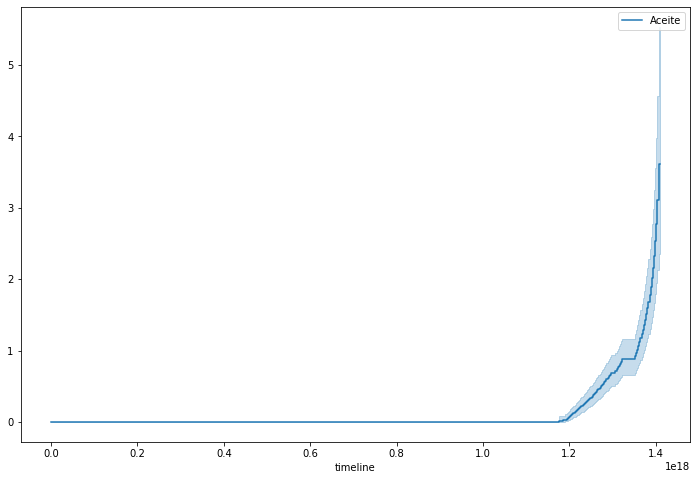

In [89]:
#Se utiliza la funcion NelsonAaleFitter() para el calculo del Hazar rate
naf_aceite = NelsonAalenFitter()
naf_aceite.fit(df_aceite_ht['Date'], event_observed = (df_aceite_ht['boolVar']/df_aceite_ht['NoVar_ant']),label="Aceite")
#naf_aceite.cumulative_hazard_
#naf_aceite.baseline_hazard_
naf_aceite.plot(figsize=(12,8))

*Hazard Rate para el Agua*

In [70]:
df_agua=df_agua.sort_values(by =['Year','Month'], ascending=True)
df_agua_sf = df_agua.filter(["Year", "Month", "Product","Precio"]).reset_index()
#df_agua_sf

In [71]:
## Se crea una columna de variaciones
df_pr_var1 = df_agua.groupby(['Product']).rolling(2).agg({'Precio': variacion_precios}).reset_index()[['Product', 'Precio']]
df_agua_sf['variacion'] = df_pr_var1['Precio']
df_agua_sf['boolVar'] = df_agua_sf['variacion']!=0
true=[True]
df_agua_sf_true=df_agua_sf[(df_agua_sf["boolVar"].isin(true))] #frame de variaciones
false=[False]
df_agua_sf_false=df_agua_sf[(df_agua_sf["boolVar"].isin(false))] #frame de no variaciones
#Data Frame de los trues (variaciones) agrupados para cada mes y anio correspondientes
df_agua_st=df_agua_sf_true.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_agua_ht=df_agua_st #creo un drame que contenga al base de los trues
df_agua_hr=df_agua_sf_false.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_agua_ht['NoVar'] = df_agua_hr['boolVar']
#df_agua_ht

In [88]:
## Se agrega la columna de No variantes t-1 y una columna de dates al dataframe
df_agua_ht['NoVar_ant'] = 1
df_agua_ht.loc[np.arange(1, len(df_agua_ht)), 'NoVar_ant'] = df_agua_ht.loc[np.arange(0, len(df_agua_ht)-1), 'NoVar'].values 
df_agua_ht['Date'] = pd.to_datetime(df_agua_ht[['Year', 'Month']].assign(Day=1))
#df_agua_ht

<lifelines.NelsonAalenFitter:"Agua", fitted with 90 total observations, 89 right-censored observations>

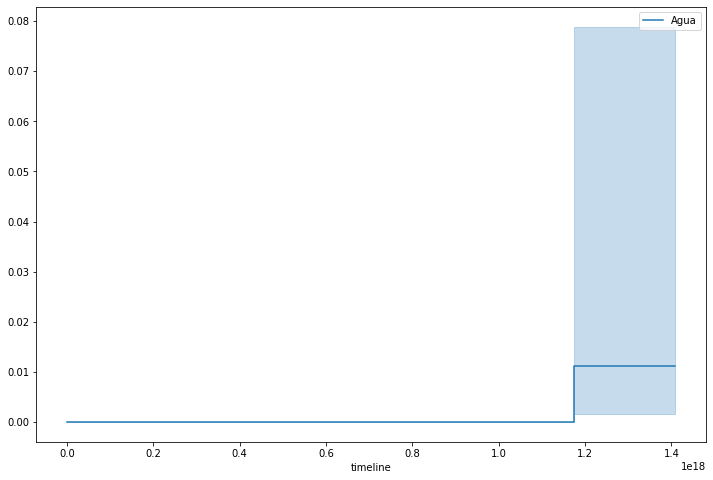

In [90]:
#Se utiliza la funcion NelsonAaleFitter() para el calculo del Hazar rate
naf_agua = NelsonAalenFitter()
naf_agua.fit(df_agua_ht['Date'], event_observed = (df_agua_ht['boolVar']/df_agua_ht['NoVar_ant']),label="Agua")
#naf_aceite.cumulative_hazard_
#naf_aceite.baseline_hazard_
naf_agua.plot(figsize=(12,8))

*Hazard Rate para el Refresco*

In [77]:
df_refrescos=df_refrescos.sort_values(by =['Year','Month'], ascending=True)
df_refrescos_sf = df_refrescos.filter(["Year", "Month", "Product","Precio"]).reset_index()
#df_refresco_sf

In [78]:
## Se crea una columna de variaciones
df_pr_var1 = df_refrescos.groupby(['Product']).rolling(2).agg({'Precio': variacion_precios}).reset_index()[['Product', 'Precio']]
df_refrescos_sf['variacion'] = df_pr_var1['Precio']
df_refrescos_sf['boolVar'] = df_refrescos_sf['variacion']!=0
## se crea una columna de los productos que variaron
true=[True]
df_refrescos_sf_true=df_refrescos_sf[(df_refrescos_sf["boolVar"].isin(true))] #frame de variaciones
## se crea una columna de los productos que no variaron
false=[False]
df_refrescos_sf_false=df_refrescos_sf[(df_refrescos_sf["boolVar"].isin(false))] #frame de no variaciones
#Data Frame de los trues (variaciones) agrupados para cada mes y anio correspondientes
df_refrescos_st=df_refrescos_sf_true.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_refrescos_ht=df_refrescos_st #creo un drame que contenga al base de los trues
df_refrescos_hr=df_refrescos_sf_false.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_refrescos_ht['NoVar'] = df_refrescos_hr['boolVar']
#df_refresco_ht

In [86]:
## Se agrega la columna de No variantes t-1 y una columna de dates al dataframe
df_refrescos_ht['NoVar_ant'] = 1
df_refrescos_ht.loc[np.arange(1, len(df_refrescos_ht)), 'NoVar_ant'] = df_refrescos_ht.loc[np.arange(0, len(df_refrescos_ht)-1), 'NoVar'].values 
df_refrescos_ht['Date'] = pd.to_datetime(df_agua_ht[['Year', 'Month']].assign(Day=1))
#df_agua_ht

<lifelines.NelsonAalenFitter:"Refrescos", fitted with 90 total observations, 53 right-censored observations>

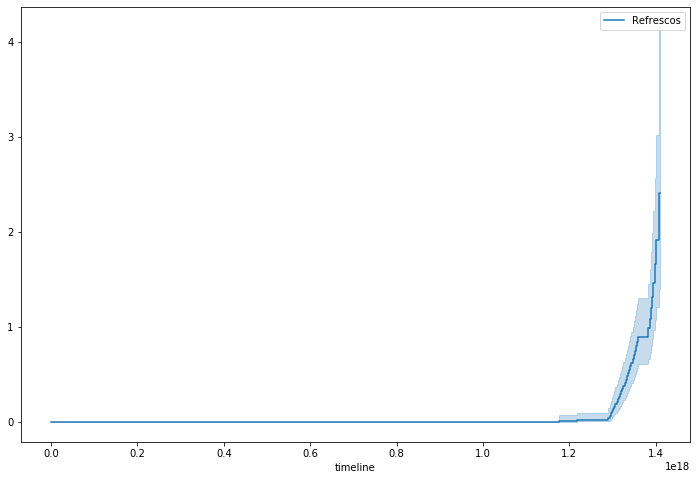

In [91]:
#Se utiliza la funcion NelsonAaleFitter() para el calculo del Hazar rate
naf_refrescos = NelsonAalenFitter()
naf_refrescos.fit(df_refrescos_ht['Date'], event_observed = (df_refrescos_ht['boolVar']/df_refrescos_ht['NoVar_ant']),label="Refrescos")
#naf_aceite.cumulative_hazard_
#naf_aceite.baseline_hazard_
naf_refrescos.plot(figsize=(12,8))

*Hazard Rate para el Mayonesa*

In [96]:
df_mayonesa=df_mayonesa.sort_values(by =['Year','Month'], ascending=True)
df_mayonesa_sf = df_mayonesa.filter(["Year", "Month", "Product","Precio"]).reset_index()
#df_mayonesa_sf

In [97]:
## Se crea una columna de variaciones
df_pr_var1 = df_mayonesa.groupby(['Product']).rolling(2).agg({'Precio': variacion_precios}).reset_index()[['Product', 'Precio']]
df_mayonesa_sf['variacion'] = df_pr_var1['Precio']
df_mayonesa_sf['boolVar'] = df_mayonesa_sf['variacion']!=0
## se crea una columna de los productos que variaron
true=[True]
df_mayonesa_sf_true=df_mayonesa_sf[(df_mayonesa_sf["boolVar"].isin(true))] #frame de variaciones
## se crea una columna de los productos que no variaron
false=[False]
df_mayonesa_sf_false=df_mayonesa_sf[(df_mayonesa_sf["boolVar"].isin(false))] #frame de no variaciones
#Data Frame de los trues (variaciones) agrupados para cada mes y anio correspondientes
df_mayonesa_st=df_mayonesa_sf_true.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_mayonesa_ht=df_mayonesa_st #creo un drame que contenga al base de los trues
df_mayonesa_hr=df_mayonesa_sf_false.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_mayonesa_ht['NoVar'] = df_mayonesa_hr['boolVar']
#df_mayonesa_ht

In [98]:
## Se agrega la columna de No variantes t-1 y una columna de dates al dataframe
df_mayonesa_ht['NoVar_ant'] = 1
df_mayonesa_ht.loc[np.arange(1, len(df_mayonesa_ht)), 'NoVar_ant'] = df_mayonesa_ht.loc[np.arange(0, len(df_mayonesa_ht)-1), 'NoVar'].values 
df_mayonesa_ht['Date'] = pd.to_datetime(df_mayonesa_ht[['Year', 'Month']].assign(Day=1))
#df_mayonesa_ht

<lifelines.NelsonAalenFitter:"Mayonesa", fitted with 90 total observations, 49 right-censored observations>

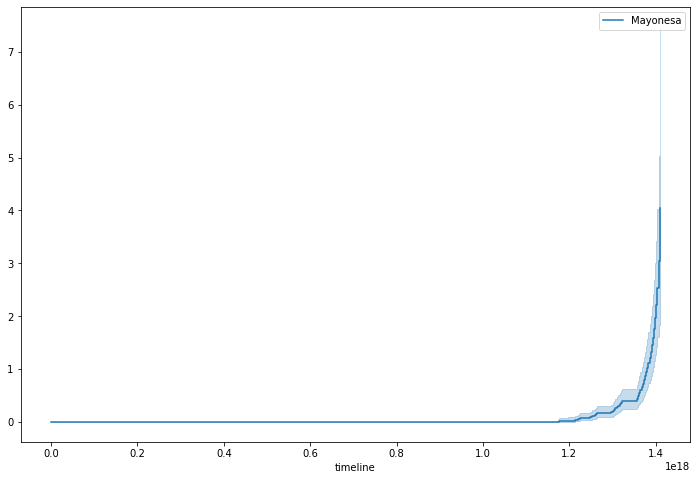

In [100]:
#Se utiliza la funcion NelsonAaleFitter() para el calculo del Hazar rate
naf_mayonesa = NelsonAalenFitter()
naf_mayonesa.fit(df_mayonesa_ht['Date'], event_observed = (df_mayonesa_ht['boolVar']/df_mayonesa_ht['NoVar_ant']),label="Mayonesa")
#naf_aceite.cumulative_hazard_
#naf_aceite.baseline_hazard_
naf_mayonesa.plot(figsize=(12,8))

*Hazard Rate para el Yerba*

In [101]:
df_yerba=df_yerba.sort_values(by =['Year','Month'], ascending=True)
df_yerba_sf = df_yerba.filter(["Year", "Month", "Product","Precio"]).reset_index()
#df_yerba_sf

In [102]:
## Se crea una columna de variaciones
df_pr_var1 = df_yerba.groupby(['Product']).rolling(2).agg({'Precio': variacion_precios}).reset_index()[['Product', 'Precio']]
df_yerba_sf['variacion'] = df_pr_var1['Precio']
df_yerba_sf['boolVar'] = df_yerba_sf['variacion']!=0
## se crea una columna de los productos que variaron
true=[True]
df_yerba_sf_true=df_yerba_sf[(df_yerba_sf["boolVar"].isin(true))] #frame de variaciones
## se crea una columna de los productos que no variaron
false=[False]
df_yerba_sf_false=df_yerba_sf[(df_yerba_sf["boolVar"].isin(false))] #frame de no variaciones
#Data Frame de los trues (variaciones) agrupados para cada mes y anio correspondientes
df_yerba_st=df_yerba_sf_true.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_yerba_ht=df_yerba_st #creo un drame que contenga al base de los trues
df_yerba_hr=df_yerba_sf_false.groupby(["Year","Month"],as_index=True)["boolVar"].size().reset_index()
df_yerba_ht['NoVar'] = df_yerba_hr['boolVar']
#df_yerba_ht

In [103]:
## Se agrega la columna de No variantes t-1 y una columna de dates al dataframe
df_yerba_ht['NoVar_ant'] = 1
df_yerba_ht.loc[np.arange(1, len(df_yerba_ht)), 'NoVar_ant'] = df_yerba_ht.loc[np.arange(0, len(df_yerba_ht)-1), 'NoVar'].values 
df_yerba_ht['Date'] = pd.to_datetime(df_yerba_ht[['Year', 'Month']].assign(Day=1))
#df_yerba_ht

<lifelines.NelsonAalenFitter:"Yerba", fitted with 90 total observations, 71 right-censored observations>

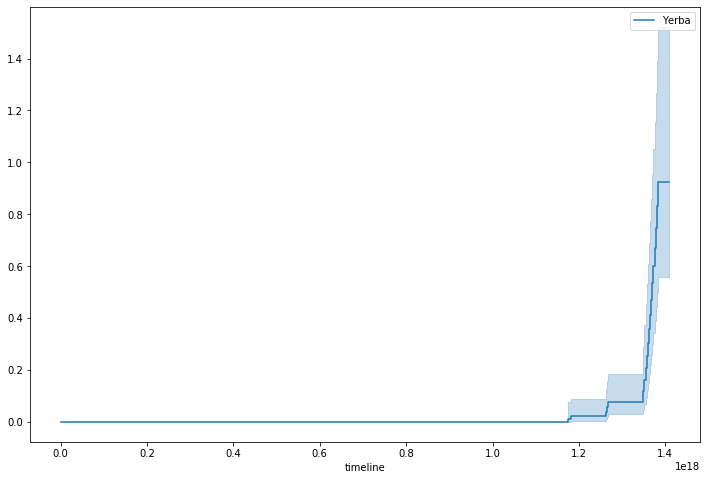

In [104]:
#Se utiliza la funcion NelsonAaleFitter() para el calculo del Hazar rate
naf_yerba = NelsonAalenFitter()
naf_yerba.fit(df_yerba_ht['Date'], event_observed = (df_yerba_ht['boolVar']/df_yerba_ht['NoVar_ant']),label="Yerba")
#naf_aceite.cumulative_hazard_
#naf_aceite.baseline_hazard_
naf_yerba.plot(figsize=(12,8))